In [1]:
import sys  
sys.path.insert(0, '/home/dfki/Desktop/Thesis/hyperopt')
import temp
import vector
import pickle
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import random
from hyperopt import fmin, tpe, hp, STATUS_OK,Trials,trials_from_docs
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans,SpectralClustering,k_means
import random
import pickle
import numpy as np
import scipy
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
df_31 = pickle.load(open("/home/dfki/Desktop/Thesis/openml_test/pickel_files/31/df_31.p", "rb"))
print(df_31.shape)

(6642, 94)


In [3]:
#replace the facke None with real one 
df_31 = df_31.replace(['This_is_None'],[np.nan]) 
df_31.head()

,run_id,flow_id,accuracy,f_measure,area_under_roc_curve,average_cost,kappa,kb_relative_information_score,mean_absolute_error,mean_prior_absolute_error,...,mlpclassifier__nesterovs_momentum,mlpclassifier__power_t,mlpclassifier__shuffle,mlpclassifier__solver,mlpclassifier__tol,sgdclassifier__loss,sgdclassifier__penalty,sgdclassifier__alpha,sgdclassifier__max_iter,sgdclassifier__tol
0,3807068,6840,0.7,0.576471,0.500000,0.0,0.0,0.373330,0.420000,0.42016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3809199,6840,0.7,0.576471,0.660781,0.0,0.0,78.757111,0.372358,0.42016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3809243,6840,0.7,0.576471,0.500000,0.0,0.0,0.373330,0.420000,0.42016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3809448,6840,0.7,0.576471,0.500000,0.0,0.0,0.373330,0.420000,0.42016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3811787,6840,0.7,0.576471,0.660781,0.0,0.0,78.757111,0.372358,0.42016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#remove complete None columns and impute the None values

df_31 = df_31.dropna(axis='columns', how='all')
print(df_31.shape) 
df_31 = df_31.replace(['auto'],[200]) # only several 'auto' in the df_31 wich we need to replace by 200 we claculate with hand 

df_31.head()

(6642, 83)


,run_id,flow_id,accuracy,f_measure,area_under_roc_curve,average_cost,kappa,kb_relative_information_score,mean_absolute_error,mean_prior_absolute_error,...,mlpclassifier__n_iter_no_change,mlpclassifier__nesterovs_momentum,mlpclassifier__power_t,mlpclassifier__shuffle,mlpclassifier__solver,mlpclassifier__tol,sgdclassifier__loss,sgdclassifier__penalty,sgdclassifier__alpha,sgdclassifier__tol
0,3807068,6840,0.7,0.576471,0.500000,0.0,0.0,0.373330,0.420000,0.42016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3809199,6840,0.7,0.576471,0.660781,0.0,0.0,78.757111,0.372358,0.42016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3809243,6840,0.7,0.576471,0.500000,0.0,0.0,0.373330,0.420000,0.42016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3809448,6840,0.7,0.576471,0.500000,0.0,0.0,0.373330,0.420000,0.42016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3811787,6840,0.7,0.576471,0.660781,0.0,0.0,78.757111,0.372358,0.42016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = temp.encoder(df_31)
df.head()

,run_id,flow_id,accuracy,f_measure,area_under_roc_curve,average_cost,kappa,kb_relative_information_score,mean_absolute_error,mean_prior_absolute_error,...,invscaling,False,True,False,True,adam,lbfgs,sgd,perceptron,l2
0,3807068,6840,0.7,0.576471,0.500000,0.0,0.0,0.373330,0.420000,0.42016,...,0,0,0,0,0,0,0,0,0,0
1,3809199,6840,0.7,0.576471,0.660781,0.0,0.0,78.757111,0.372358,0.42016,...,0,0,0,0,0,0,0,0,0,0
2,3809243,6840,0.7,0.576471,0.500000,0.0,0.0,0.373330,0.420000,0.42016,...,0,0,0,0,0,0,0,0,0,0
3,3809448,6840,0.7,0.576471,0.500000,0.0,0.0,0.373330,0.420000,0.42016,...,0,0,0,0,0,0,0,0,0,0
4,3811787,6840,0.7,0.576471,0.660781,0.0,0.0,78.757111,0.372358,0.42016,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# df_31['DFC'] = df_31['data_preprocessing'] + df_31['feature_preprocessing']+ df_31['classifier']

In [7]:
for i in range(len(df.columns)):
    print(i,df.columns[i])

0 run_id
1 flow_id
2 accuracy
3 f_measure
4 area_under_roc_curve
5 average_cost
6 kappa
7 kb_relative_information_score
8 mean_absolute_error
9 mean_prior_absolute_error
10 prior_entropy
11 relative_absolute_error
12 root_mean_prior_squared_error
13 root_mean_squared_error
14 root_relative_squared_error
15 decisiontreeclassifier__max_depth
16 decisiontreeclassifier__min_samples_leaf
17 decisiontreeclassifier__min_samples_split
18 VarianceThreshold__threshold
19 randomforestclassifier__min_samples_leaf
20 randomforestclassifier__min_samples_split
21 randomforestclassifier__min_weight_fraction_leaf
22 randomforestclassifier__max_features
23 randomforestclassifier__n_estimators
24 gradientboostingclassifier__learning_rate
25 gradientboostingclassifier__max_depth
26 gradientboostingclassifier__max_features
27 gradientboostingclassifier__min_impurity_decrease
28 gradientboostingclassifier__min_samples_leaf
29 gradientboostingclassifier__min_samples_split
30 gradientboostingclassifier__min_w

In [8]:
df.to_csv('df_312.csv', index=True) 

In [ ]:
random.seed(0)
sampling = random.choices(range(6642), k=50)
print(sampling)

## without evaluation features 

In [9]:
df101 = df.iloc[:,15:]
# df69_50= df69.iloc[sampling]
# X = df69_50.values
X = df101.values
X.shape

(6642, 101)

## with evaluation features

In [ ]:
#X = df_31.values

#X = df_31.iloc[sampling].values
#X.shape

(6642, 101)
Cluster_number
0    6592
1      50
Name: cluster_2, dtype: int64
---------------------------------------
Cluster_number
0    5327
1      50
2    1265
Name: cluster_3, dtype: int64
---------------------------------------
Cluster_number
0    5277
1      50
2    1265
3      50
Name: cluster_4, dtype: int64
---------------------------------------
Cluster_number
0    5277
1      50
2    1211
3      50
4      54
Name: cluster_5, dtype: int64
---------------------------------------
Cluster_number
0    5276
1      50
2    1211
3      50
4      54
5       1
Name: cluster_6, dtype: int64
---------------------------------------
Cluster_number
0    5276
1      50
2    1169
3      50
4      54
5       1
6      42
Name: cluster_7, dtype: int64
---------------------------------------
Cluster_number
0    5276
1      50
2    1113
3      50
4      54
5       1
6      42
7      56
Name: cluster_8, dtype: int64
---------------------------------------
Cluster_number
0    2955
1      50
2    111

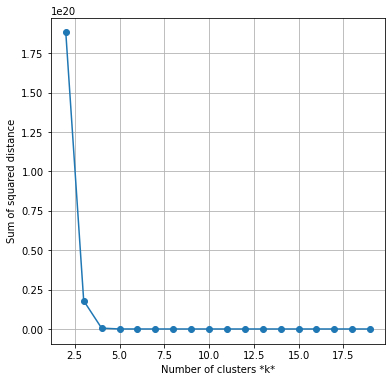

In [10]:
#find the best K    
SSE,CENTER,CLUSTER_MAP  = temp.find_best_k(X,20)

#### SSE
I have implimented the function calculate_SSE myself to check how sse claculated and the result are the same.

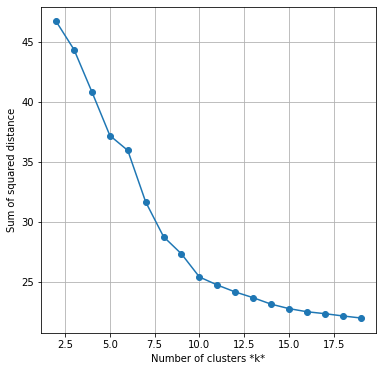

In [11]:
plt.figure(figsize=(6, 6))
plt.plot(range(2,20), np.log(SSE), '-o')
plt.xlabel('Number of clusters *k*')
plt.ylabel('Sum of squared distance')
plt.grid(True)


In [12]:
def calculate_SSE(X,centers,cluster_map,maxk):
    for k in range(2,maxk):
        sum_dist = []
        for j in range(k):
            l = np.where([cluster_map['cluster_{}'.format(k)] == j])[1]
            for i in l:
                dist = ((X[i] - centers[k][j])**2).sum()
                sum_dist.append(dist)
        sse = np.array(sum_dist).sum()
        print("k={}, sse={}".format(k,sse))

In [13]:
calculate_SSE(X,CENTER,CLUSTER_MAP,20)

k=2, sse=1.8822551669900463e+20
k=3, sse=1.7930157011808416e+19
k=4, sse=5.2688525250556e+17
k=5, sse=1.4058774929040214e+16
k=6, sse=4065853312751057.5
k=7, sse=55645403640552.61
k=8, sse=3071862400275.7617
k=9, sse=734219543424.4525
k=10, sse=107803283370.14804
k=11, sse=55072853789.40387
k=12, sse=30939688578.9088
k=13, sse=19205176196.543507
k=14, sse=11227374773.238956
k=15, sse=7732823943.507832
k=16, sse=5960032510.853987
k=17, sse=5076494847.229318
k=18, sse=4202715603.925137
k=19, sse=3542457417.797501


In [ ]:
def calculate_SSE_for_each_cluster(X,centers,cluster_map,k):

    sum_dist = []
    for j in range(k):
        l = np.where([cluster_map['cluster_{}'.format(k)] == j])[1]
        for i in l:
            dist = ((X[i] - centers[k][j])**2).sum()
            sum_dist.append(dist)
        print('sse for cluster {}: {}'.format(j,np.array(sum_dist).sum()))
    sse = np.array(sum_dist).sum()
    
    print("k={}, sse={}".format(k,sse))

In [ ]:
calculate_SSE_for_each_cluster(X,CENTER,CLUSTER_MAP,10)

In [ ]:
import pickle
experiment5 = pickle.load(open("/home/dfki/Desktop/Thesis/hyperopt/result_openml/mylaptop/31/automatic/new/cluster/random_percentage.p", "rb"))
temp.expriment_ploter(experiment5,'random_percentage')

# insight to each cluster

In [ ]:
def cluter_report(X,centers,cluster_map,maxk):
    for k in range(2,maxk):
        avg_acc =[]
        avg_f1 = []
        for j in range(k):
            l = np.where([cluster_map['cluster_{}'.format(k)] == j])[1]


#             print("k={}, cluster={},len={}, DFC={} ".format( k,j,len(l),set(df_31['DFC'][l])))
            print("k={}, cluster={},len={} ".format( k,j,len(l)))

            print("Data preprocessing:{}, Feature preprosser:{}, Classifier:{}".format(set(df_31['data_preprocessing'][l]),set(df_31['feature_preprocessing'][l]),set(df_31['classifier'][l])))

            print('max acc in cluster {} --- Min acc in cluster {}  ---- Mean acc{}'.format(df_31['accuracy'][l].max(),df_31['accuracy'][l].min(),df_31['accuracy'][l].mean()))
            print('------------------------------------')
        print("-------------------------------------------------------")

In [15]:
temp.cluter_report(df_31,CLUSTER_MAP,11)

k=2, cluster=0,len=6592 
Data preprocessing:{'SimpleImputer', 'ColumnTransformer'}, Feature preprosser:{'do_noting', 'VarianceThreshold'}, Classifier:{'bernoullinb', 'mlpclassifier', 'randomforestclassifier', 'sgdclassifier', 'gradientboostingclassifier', 'extratreesclassifier', 'fkceigenpro', 'svc', 'decisiontreeclassifier'}
max acc in cluster 0.7809999999999999 --- Min acc in cluster 0.24100000000000002  ---- Mean acc0.7187190533980583
------------------------------------
k=2, cluster=1,len=50 
Data preprocessing:{'SimpleImputer'}, Feature preprosser:{'do_noting'}, Classifier:{'fkceigenpro'}
max acc in cluster 0.779 --- Min acc in cluster 0.7559999999999999  ---- Mean acc0.7694799999999999
------------------------------------
-------------------------------------------------------
k=3, cluster=0,len=5327 
Data preprocessing:{'SimpleImputer', 'ColumnTransformer'}, Feature preprosser:{'do_noting', 'VarianceThreshold'}, Classifier:{'bernoullinb', 'mlpclassifier', 'randomforestclassifier

max acc in cluster 0.778 --- Min acc in cluster 0.755  ---- Mean acc0.7635476190476191
------------------------------------
k=10, cluster=7,len=56 
Data preprocessing:{'SimpleImputer'}, Feature preprosser:{'do_noting'}, Classifier:{'fkceigenpro'}
max acc in cluster 0.778 --- Min acc in cluster 0.7559999999999999  ---- Mean acc0.7656428571428572
------------------------------------
k=10, cluster=8,len=2321 
Data preprocessing:{'SimpleImputer', 'ColumnTransformer'}, Feature preprosser:{'do_noting', 'VarianceThreshold'}, Classifier:{'svc'}
max acc in cluster 0.78 --- Min acc in cluster 0.513  ---- Mean acc0.7133007324429125
------------------------------------
k=10, cluster=9,len=68 
Data preprocessing:{'SimpleImputer'}, Feature preprosser:{'do_noting'}, Classifier:{'fkceigenpro'}
max acc in cluster 0.78 --- Min acc in cluster 0.7559999999999999  ---- Mean acc0.7686470588235295
------------------------------------
-------------------------------------------------------


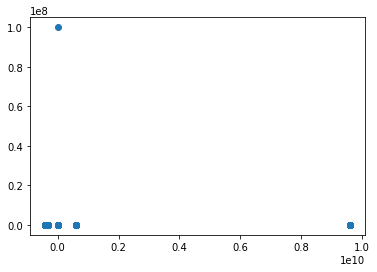

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)


principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['component1', 'component2'])
a = principalDf.values

fig, ax = plt.subplots()
ax.scatter(a[:,0],a[:,1])

## Find the cluster size based on silhouette

For n_clusters = 2, silhouette score is 0.9863497986266451)
For n_clusters = 3, silhouette score is 0.9797732497896744)
For n_clusters = 4, silhouette score is 0.9951205614315957)
For n_clusters = 5, silhouette score is 0.9983883539819979)
For n_clusters = 6, silhouette score is 0.9982153718031744)
For n_clusters = 7, silhouette score is 0.9977676939004865)
For n_clusters = 8, silhouette score is 0.997240780583281)
For n_clusters = 9, silhouette score is 0.946381491320357)


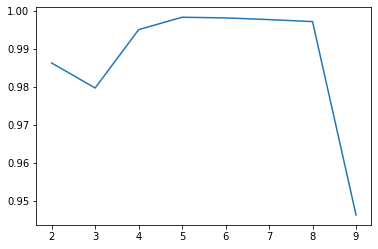

In [17]:
scors=[]
for n_clusters in range(2,10):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    scors.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
plt.plot(range(2,10),scors)

In [ ]:
all_cluster = []

In [ ]:
all_cluster = temp.selecet_index_base_kmeans(X,5,50)
len(all_cluster)

In [ ]:
l = np.where([CLUSTER_MAP['cluster_10'] == 0])[1]
print(len(l))
all_cluster = list(all_cluster) + list(l) 
print(len(all_cluster))

In [ ]:
df_31['classifier'].unique()

In [ ]:
trial_31 = pickle.load(open("/home/dfki/Desktop/Thesis/openml_test/pickel_files/31/trial_31_withrunid1.p", "rb"))
len(trial_31.trials)

In [ ]:
t_1724 = temp.specialindex_trial_builder(trial_31,all_cluster)
pickle.dump(t_1724, open('/home/dfki/Desktop/Thesis/hyperopt/result_openml/final_result/31/kmeans/buildup_trial/250_k=5_allclustersample.p','wb'))

In [ ]:
np.array(t_1724.losses()).mean()

In [ ]:
test = pickle.load(open("/home/dfki/Desktop/Thesis/hyperopt/result_openml/mylaptop/31/automatic/new/552in_kmeans8_eval.p", "rb"))
len(test.trials)

In [ ]:
a =[]
for i in range(552):
    a.append(abs(test.trials[i]['result']['loss']))
print(np.array(a).max())